# 线性回归案例

Parameter containing:
tensor([[2.5145]], requires_grad=True) Parameter containing:
tensor([5.2181], requires_grad=True)


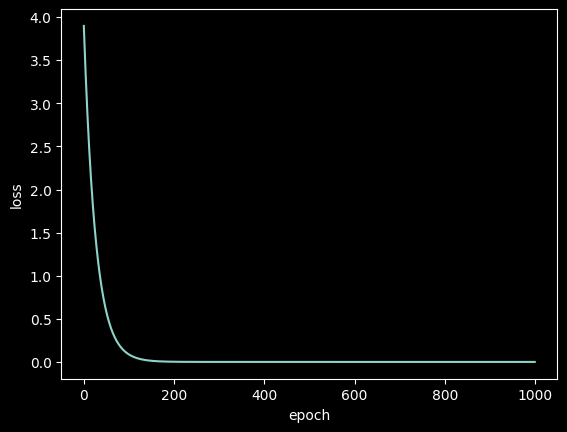

In [1]:
import torch
import matplotlib.pyplot as plt
from torch import nn, optim  # 模型、损失函数和优化器
from torch.utils.data import TensorDataset, DataLoader  # 数据集和数据加载器

# 构建数据集
X = torch.randn(100, 1)  # 输入
w = torch.tensor([2.5])  # 权重
b = torch.tensor([5.2])  # 偏置
noise = torch.randn(100, 1) * 0.1  # 噪声
y = w * X + b + noise  # 目标
dataset = TensorDataset(X, y)  # 构造数据集对象
dataloader = DataLoader(
    dataset, batch_size=10, shuffle=True
)  # 构造数据加载器对象，batch_size为每次训练的样本数，shuffle为是否打乱数据

# 构造模型
model = nn.Linear(in_features=1, out_features=1)  # 线性回归模型，1个输入，1个输出

# 损失函数和优化器
loss = nn.MSELoss()  # 均方误差损失函数
optimizer = optim.SGD(model.parameters(), lr=1e-3)  # 随机梯度下降，学习率0.001

# 模型训练
loss_list = []
for epoch in range(1000):
    total_loss = 0
    train_num = 0
    for x_train, y_train in dataloader:
        # 每次训练一个batch大小的数据
        y_pred = model(x_train)  # 模型预测
        loss_value = loss(y_pred, y_train)  # 计算损失
        total_loss += loss_value.item()
        train_num += len(y_train)
        optimizer.zero_grad()  # 梯度清零
        loss_value.backward()  # 反向传播
        optimizer.step()  # 更新参数
    loss_list.append(total_loss / train_num)

print(model.weight, model.bias)  # 打印权重和偏置
plt.plot(loss_list)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()